#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib as mpl

In [2]:
import tensorflow as tf
from tensorflow import keras

#### Importing Dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [4]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

#### Normalising and Splitting data into train/validation/test

In [5]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

In [6]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

#### Creating Model Architecture

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model = keras.models.Sequential()

In [9]:
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


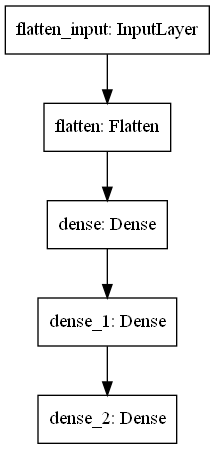

In [11]:
import pydotplus
keras.utils.plot_model(model)

#### Compiling the Model

In [12]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [13]:
model_history = model.fit(X_train, y_train, epochs = 60, validation_data = (X_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7493 - accuracy: 0.7592 - val_loss: 0.5431 - val_accuracy: 0.8112
Epoch 2/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4965 - accuracy: 0.8265 - val_loss: 0.4565 - val_accuracy: 0.8467
Epoch 3/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4493 - accuracy: 0.8434 - val_loss: 0.4780 - val_accuracy: 0.8295
Epoch 4/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4233 - accuracy: 0.8517 - val_loss: 0.4047 - val_accuracy: 0.8627
Epoch 5/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4045 - accuracy: 0.8573 - val_loss: 0.4018 - val_accuracy: 0.8575
Epoch 6/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3870 - accuracy: 0.8647 - val_loss: 0.3911 - val_accuracy: 0.8657
Epoch 7/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3743 - accuracy: 0.8673 - val_loss: 0.3919 - val_accuracy:

In [14]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [15]:
model_history.history

{'loss': [0.7493051290512085,
  0.49647700786590576,
  0.4493192732334137,
  0.4233124554157257,
  0.40450018644332886,
  0.3869546353816986,
  0.37429800629615784,
  0.36240801215171814,
  0.352384090423584,
  0.3414357602596283,
  0.33364877104759216,
  0.3260120451450348,
  0.31822293996810913,
  0.31123408675193787,
  0.30476030707359314,
  0.2986615002155304,
  0.2933214008808136,
  0.2871818244457245,
  0.2818330228328705,
  0.27679187059402466,
  0.27253228425979614,
  0.26803573966026306,
  0.2625524401664734,
  0.2589191198348999,
  0.2527727782726288,
  0.2499658316373825,
  0.2459379881620407,
  0.24134190380573273,
  0.23789054155349731,
  0.2343086302280426,
  0.22974413633346558,
  0.22660821676254272,
  0.2242152988910675,
  0.22149191796779633,
  0.21725958585739136,
  0.21435749530792236,
  0.21099723875522614,
  0.20769102871418,
  0.2047608643770218,
  0.20113146305084229,
  0.19911573827266693,
  0.19709543883800507,
  0.19351734220981598,
  0.19150182604789734,
  0

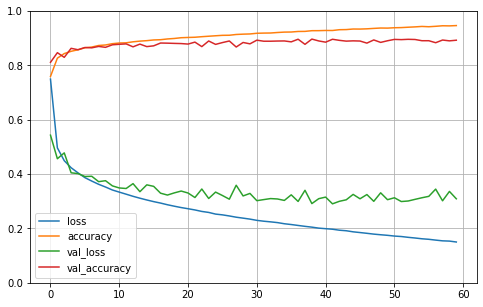

In [16]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8864


[0.34405553340911865, 0.8863999843597412]

#### Predicting

In [18]:
X_new = X_test[:5]

In [19]:
y_pred = np.argmax(model.predict(X_new), axis = -1)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [20]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

AxesImage(54,36;334.8x217.44)


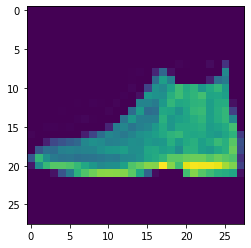

In [21]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


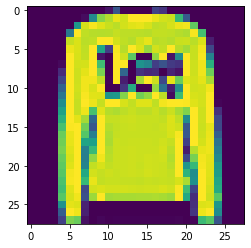

In [22]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


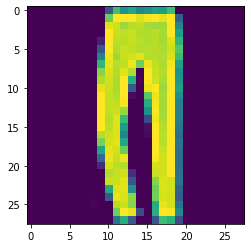

In [23]:
print(plt.imshow(X_test[2]))

AxesImage(54,36;334.8x217.44)


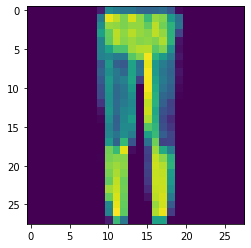

In [24]:
print(plt.imshow(X_test[3]))

AxesImage(54,36;334.8x217.44)


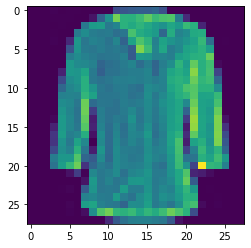

In [25]:
print(plt.imshow(X_test[4]))